# Notebook to visualize the data given user input #

Features:
- User input = selection
- visualization of cumulative sum of positives vs time
- seleccion por departamento, provincia, region

Future:
- Acceleration?
- Log scale?

useful resource:
https://www.dataquest.io/blog/tutorial-time-series-analysis-with-pandas/

### Set up session + load files ###

In [1]:
%matplotlib inline

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
sns.set(rc={'figure.figsize':(11, 4)})

In [4]:
input_file = 'data/positivos_covid.csv'
df_positivos = pd.read_csv(input_file, 
                           encoding='ISO-8859-1', 
                           na_values="nan").drop(columns=['UUID']).dropna(subset=['FECHA_RESULTADO'])
# df_positivos

Clean dates:
- dropna
- make column with datetime

In [15]:
def add_20(date):
    try: 
        assert(isinstance(date, str))
        if date[-4:] != "2020":
            date = date +"20"
    except AssertionError:
        print('assertionError on ', date)
    return date

df_positivos['fixed_date'] = df_positivos['FECHA_RESULTADO'].apply(func=add_20)
df_positivos['fixed_date'] = pd.to_datetime(df_positivos['fixed_date'], format="%d/%m/%Y")

#fixed_date now has datetime + no nans + month/day are right

### Filter selection with user input ###

Later on, buttons can be made to click instead of type...
or maybe dropdown menu

In [29]:
# TODO: be able to handle errors
def filter_by_location(selection, df = df_positivos):
    df['count'] = 1
    
    if selection['departamento'] != "":
        df = df[df['DEPARTAMENTO']==selection['departamento']]
    else:
        df = df.groupby(['fixed_date'], as_index=False)['count'].sum()
        df = df.set_index('fixed_date').sort_index()
        df['cum'] = df['count'].cumsum()
        return df
    
    if selection['provincia'] != "":
        df = df[df['PROVINCIA']==selection['provincia']]
    else:
        df = df.groupby(['DEPARTAMENTO', 'fixed_date'], as_index=False)['count'].sum()
        df = df[df['DEPARTAMENTO']==selection['departamento']].set_index('fixed_date').sort_index()
        df['cum'] = df['count'].cumsum()
        return df
    
    if selection['distrito'] != "":
        df = df[df['DISTRITO']==selection['distrito']]
        df = df.groupby(['DISTRITO', 'fixed_date'], as_index=False)['count'].sum()
        df = df[df['DISTRITO']==selection['distrito']].set_index('fixed_date').sort_index()
        df['cum'] = df['count'].cumsum()
        return df
    else:
        df = df.groupby(['PROVINCIA', 'fixed_date'], as_index=False)['count'].sum()
        df = df[df['PROVINCIA']==selection['provincia']].set_index('fixed_date').sort_index()
        df['cum'] = df['count'].cumsum()
        return df

In [43]:
departamento = input("Departamento?\n\t").upper()
provincia = input("Provincia?\n\t").upper()
distrito = input("Distrito?\n\t").upper()
# edad = float(input("Edad?\n\t"))  # make it range
# metodo = input("Metodo? PR/PCR\n\t").upper()
# sexo = input("Sexo? Masculino/Femenino\n\t").upper()

selection = {}
selection['departamento'] = departamento
selection['provincia'] = provincia
selection['distrito'] = distrito
# selection['edad'] = edad
# selection['metodo'] = metodo
# selection['sexo'] = sexo

Departamento?
	loreto
Provincia?
	
Distrito?
	


In [44]:
selection_data = filter_by_location(selection)

In [45]:
selection_data

,DEPARTAMENTO,count,cum
fixed_date,,,
2020-03-16,LORETO,1,1
2020-03-17,LORETO,9,10
2020-03-18,LORETO,1,11
2020-03-19,LORETO,1,12
2020-03-20,LORETO,2,14
...,...,...,...
2020-06-20,LORETO,87,8375
2020-06-21,LORETO,15,8390
2020-06-22,LORETO,205,8595


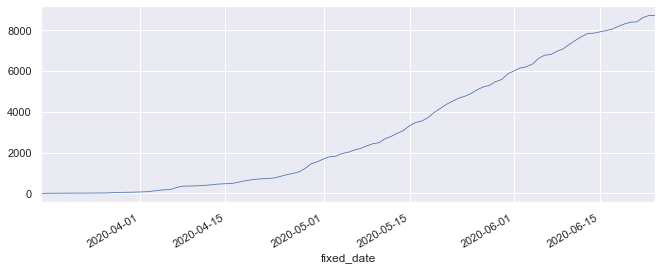

In [46]:
selection_data['cum'].plot(linewidth=0.8);
# selection_data['count'].plot(linewidth=0.8);